# Objectives of Notebook

This notebook aims to:

 1)Analyze customer data provided in data set (EDA)
 
 2)Build various ML models that can predict loan approval

## importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,RobustScaler,StandardScaler,FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

## 1. Reading the dataset

In [2]:
data=pd.read_csv("loan.csv")

In [3]:
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
560,LP002807,Male,Yes,2,Not Graduate,No,3675,242.0,108.0,360.0,1.0,Semiurban,Y
131,LP001473,Male,No,0,Graduate,No,2014,1929.0,74.0,360.0,1.0,Urban,Y
151,LP001529,Male,Yes,0,Graduate,Yes,2577,3750.0,152.0,360.0,1.0,Rural,Y
471,LP002517,Male,Yes,1,Not Graduate,No,2653,1500.0,113.0,180.0,0.0,Rural,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
503,LP002618,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural,N
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y
449,LP002444,Male,No,1,Not Graduate,Yes,2769,1542.0,190.0,360.0,NaN,Semiurban,N
385,LP002237,Male,No,1,Graduate,NaN,3667,0.0,113.0,180.0,1.0,Urban,Y


In [4]:
print(data.shape)

(614, 13)


## Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.duplicated().sum()

0

###### OBSERVATIONS:

* Many columns have null values
* 'Dependents' datatype needs to be changed
* Dataset does not have any duplicate values 

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###### 1.1 Exploring categorical columns

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64


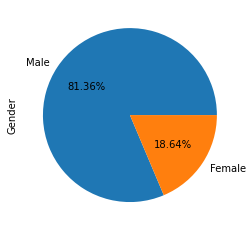

In [9]:
data['Gender'].value_counts().plot(kind='pie',autopct="%0.2f%%")
print(data['Gender'].value_counts(dropna=False))

<AxesSubplot:xlabel='Gender', ylabel='count'>

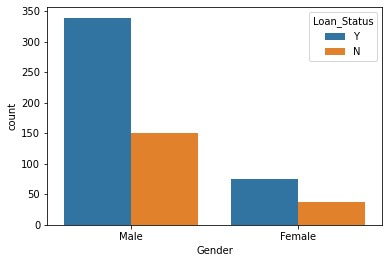

In [10]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

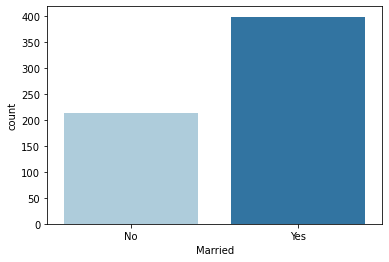

Yes    0.648208
No     0.346906
NaN    0.004886
Name: Married, dtype: float64


In [11]:
sns.countplot(x="Married", data=data, palette="Paired")
plt.show()
print(data['Married'].value_counts(dropna=False,normalize=True))

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


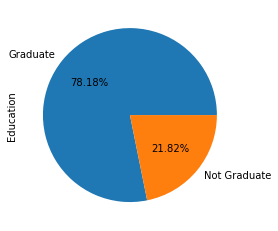

In [12]:
data['Education'].value_counts().plot(kind='pie',autopct="%0.2f%%")
print(data['Education'].value_counts(dropna=False,normalize=True))

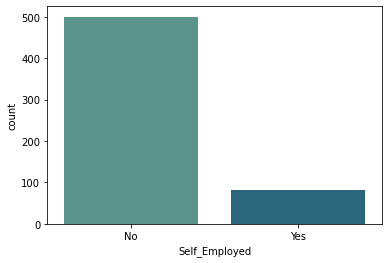

No     0.814332
Yes    0.133550
NaN    0.052117
Name: Self_Employed, dtype: float64


In [13]:
data.Self_Employed.value_counts(dropna=False)
sns.countplot(x="Self_Employed", data=data, palette="crest")
plt.show()
print(data['Self_Employed'].value_counts(dropna=False,normalize=True))


In [14]:
data.Property_Area.value_counts(dropna=False,normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

In [15]:
data.Loan_Amount_Term= data.Loan_Amount_Term/12
data.Loan_Amount_Term.value_counts(dropna=False)

30.0    512
15.0     44
40.0     15
NaN      14
25.0     13
7.0       4
20.0      4
10.0      3
3.0       2
5.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
data.Loan_Status.value_counts(dropna=False,normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [17]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,15.0,1.0,Rural,Y
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,30.0,1.0,Urban,Y
43,LP001131,Male,Yes,0,Graduate,No,3941,2336.0,134.0,30.0,1.0,Semiurban,Y
364,LP002180,Male,No,0,Graduate,Yes,6822,0.0,141.0,30.0,1.0,Rural,Y
231,LP001768,Male,Yes,0,Graduate,NaN,3716,0.0,42.0,15.0,1.0,Rural,Y


###### OBSERVATIONS:

* Majority of the applicants are male
* 65% are married and 57% have no dependents
* 78% of the applicants are graduates
* 85% of the applicants are self employed
* 84% of the applicants have credit histories that meet the required guidelines
* The property area among the applicants is roughly evenly split across semiurban, urban, and rural, with semi-urban having a slightly higher portion (37.9%)

###### 1.2 Exploring Numerical columns

In [18]:
#combining two columns
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [19]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0


LoanAmount
Skew : 2.68


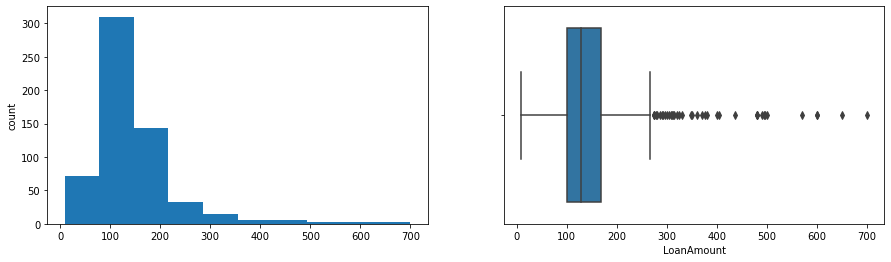

TotalIncome
Skew : 5.63


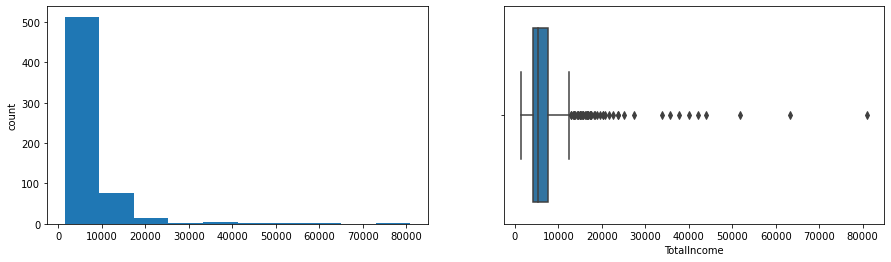

In [20]:
for col in ['LoanAmount', 'TotalIncome']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

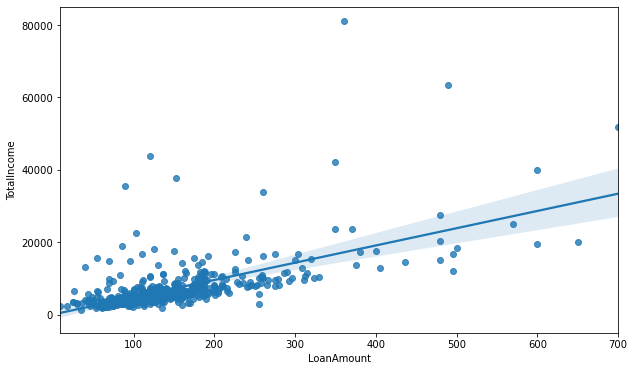

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(x='LoanAmount', y='TotalIncome', data=data)
plt.show()

###### Observations
* Both the numerical columns are highly skewed to the right 
* We can observe from the histogram that majority of values for total income are less than 10,000K dollars.
* 

# 2. Data Preprocessing

In [22]:
#changing the datatype
data["Dependents"]=data["Dependents"].replace({'3+':3}).astype(float)

In [23]:
x=data[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','TotalIncome', 'LoanAmount', 'Credit_History', 'Property_Area']]
print(x.head(5))
print(x.info())

  Gender Married  Dependents     Education Self_Employed  TotalIncome  \
0   Male      No         0.0      Graduate            No       5849.0   
1   Male     Yes         1.0      Graduate            No       6091.0   
2   Male     Yes         0.0      Graduate           Yes       3000.0   
3   Male     Yes         0.0  Not Graduate            No       4941.0   
4   Male      No         0.0      Graduate            No       6000.0   

   LoanAmount  Credit_History Property_Area  
0         NaN             1.0         Urban  
1       128.0             1.0         Rural  
2        66.0             1.0         Urban  
3       120.0             1.0         Urban  
4       141.0             1.0         Urban  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          601 non-null    object 
 1   Married         611 non-null    object 
 

In [24]:
y=data['Loan_Status'].replace({'Y':1,'N':0})
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

###### Train test split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
x_train

,Gender,Married,Dependents,Education,Self_Employed,TotalIncome,LoanAmount,Credit_History,Property_Area
406,Male,Yes,0.0,Not Graduate,No,4567.0,115.0,1.0,Urban
17,Female,No,0.0,Graduate,No,3510.0,76.0,0.0,Urban
427,Male,Yes,2.0,Graduate,No,5935.0,133.0,1.0,Semiurban
21,Male,Yes,1.0,Graduate,No,11580.0,315.0,1.0,Urban
460,NaN,Yes,0.0,Graduate,Yes,6166.0,160.0,NaN,Semiurban
...,...,...,...,...,...,...,...,...,...
277,Male,Yes,0.0,Graduate,No,4403.0,80.0,1.0,Urban
9,Male,Yes,1.0,Graduate,No,23809.0,349.0,1.0,Semiurban
359,Male,Yes,3.0,Graduate,No,8334.0,200.0,1.0,Semiurban
192,Male,Yes,0.0,Not Graduate,No,6033.0,160.0,1.0,Urban


In [26]:
#fetching numerical features
num_cols= x[['TotalIncome','LoanAmount']].columns
num_cols

Index(['TotalIncome', 'LoanAmount'], dtype='object')

In [27]:
#fetching numerical_categorical features
num_cat=x[['Dependents','Credit_History']].columns
num_cat

Index(['Dependents', 'Credit_History'], dtype='object')

In [28]:
#fetching categorical features
cat_ohe=x[['Gender','Married','Self_Employed','Education','Property_Area']].columns
cat_ohe

Index(['Gender', 'Married', 'Self_Employed', 'Education', 'Property_Area'], dtype='object')

### creating pipeline
To perform feature engineering

In [29]:
# for numerical features
pp_num = Pipeline([
    ('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
    ('rob_num', RobustScaler())
])

In [30]:
# for numerical_categorical features
pp_num_cat=Pipeline([
    ('num_cat_imp',SimpleImputer(strategy='most_frequent',add_indicator=False)),
('fun_trf', FunctionTransformer(func=np.sqrt)),
     ('rob_num', RobustScaler())
    
])

In [31]:
# for categorical features
pp_cat_ohe=Pipeline([
    ('cat_imp',SimpleImputer(strategy='most_frequent',add_indicator=False)),
     ('ohe_cat', OneHotEncoder(sparse=False, drop='first'))

])

### column Transformer
* To impute missing values
* To apply one Hot encoder on categorical columns 
* To scale the numerical columns
* To improve the skewness of numerical column

In [32]:
ct= ColumnTransformer([
    ('pp_num', pp_num, num_cols),
    ('pp_num_cat', pp_num_cat,num_cat),
    ('pp_cat_ohe',pp_cat_ohe,cat_ohe),
    
    
])

##  3.Pipeline and Models
* Logistic Regression
* Hyperparameter tuning using GridSearchCV



In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [34]:
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)

In [35]:
best_clf = clf.fit(ct.fit_transform(x_train),y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 10832 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 15520 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:   43.7s finished


In [36]:
best_clf.best_estimator_

LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear')

In [37]:
pipeb=Pipeline([
    ('ct',ct),
    ('lor',LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear'))
    
])

In [38]:
pipeb.fit(x_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('pp_num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('rob_num',
                                                                   RobustScaler())]),
                                                  Index(['TotalIncome', 'LoanAmount'], dtype='object')),
                                                 ('pp_num_cat',
                                                  Pipeline(steps=[('num_cat_imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('fun_trf',
                                                                   FunctionTransformer(func=<ufunc 'sqrt'>)),
                         

In [39]:
y_pred=pipeb.predict(x_test)

### 4. Model Evaluation

In [40]:
print("The Accuracy score-",accuracy_score(y_test,y_pred))
print("Cross-validation-",cross_val_score(pipeb, x_train, y_train, cv=5, scoring='accuracy').mean())

The Accuracy score- 0.8709677419354839
Cross-validation- 0.8025389025389025


In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
print(confusion_matrix(y_test,y_pred))

[[ 8  7]
 [ 1 46]]


In [43]:
#importing the pickle 

In [44]:
import pickle
pickle.dump(pipeb,open('pipeb.pkl','wb'))
